In [3]:
%load_ext autoreload 
!python preprocessing/extract_zipfiles.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%load_ext autoreload 
%autoreload 2
from pathlib import Path 
import os 

import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt 

import pandas as pd 

import preprocessing.utils as u
from preprocessing.text import TrainTestProcessor
from nltk.corpus import stopwords

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
sns.set()

In [9]:
## dir for loading clean data:
LOAD_DIR_CLEAN_DATA = Path("data/writes/clean_data")

In [10]:
## reading data from files: 
path = Path("data") 
writes_path = list(filter(lambda pth: 'writes' in pth.__fspath__(), 
                          path.iterdir()))[0]
writes_test_path, writes_train_path = sorted(writes_path.iterdir())
train_data, test_data = u.buid_writes_dataframe(writes_test_path, writes_train_path)

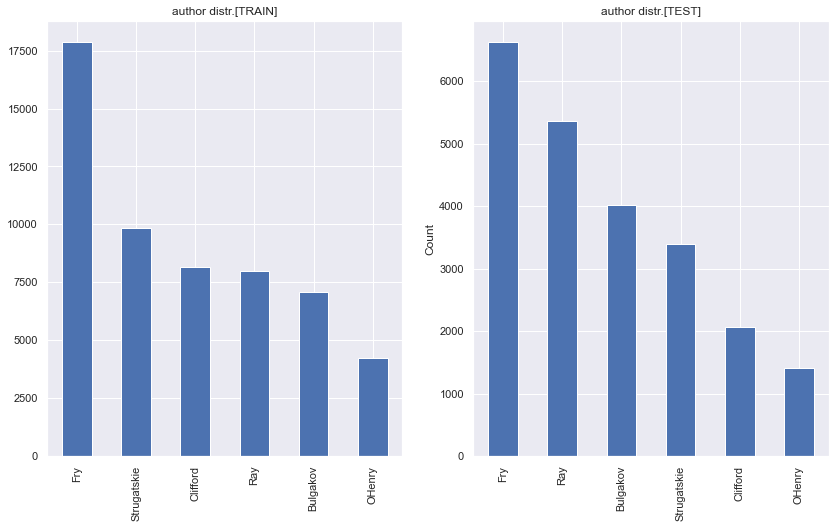

In [11]:
## distr. of target:
_, ax = plt.subplots(1,2, figsize=(14,8))
u.discrete_distr(train_data, ax=ax[0], suffix='[TRAIN]')
u.discrete_distr(test_data, ax=ax[1], suffix='[TEST]')

c:\Users\Vyacheslav\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


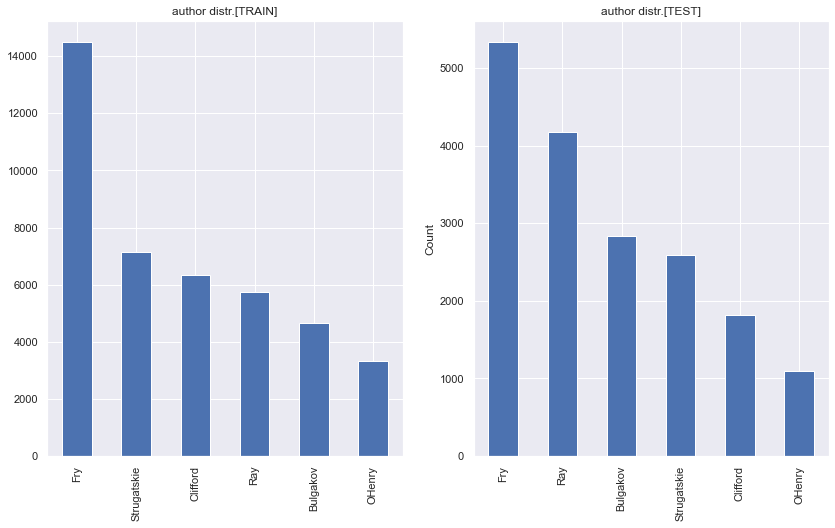

In [13]:
## Processing and filtering of text by letters, words and length of sequence: 
preprocessor = TrainTestProcessor(train_data, test_data, 
                                  target_col='author',
                                  text_col='sent',
                                  stopwords=stopwords.words('russian'))
train_data, test_data = preprocessor.transform(q=0.05)

## plot target distr.
_, ax = plt.subplots(1,2, figsize=(14,8))
u.discrete_distr(train_data, ax=ax[0], suffix='[TRAIN]')
u.discrete_distr(test_data, ax=ax[1], suffix='[TEST]')

In [18]:
train_data, test_data = preprocessor.rebalance_by_target(train_data, test_data,
                                                         test_size=.3,
                                                         text_column='sent',
                                                         target_column='author',
                                                         sampler=None#RandomUnderSampler(sampling_strategy='majority')
                                                        )

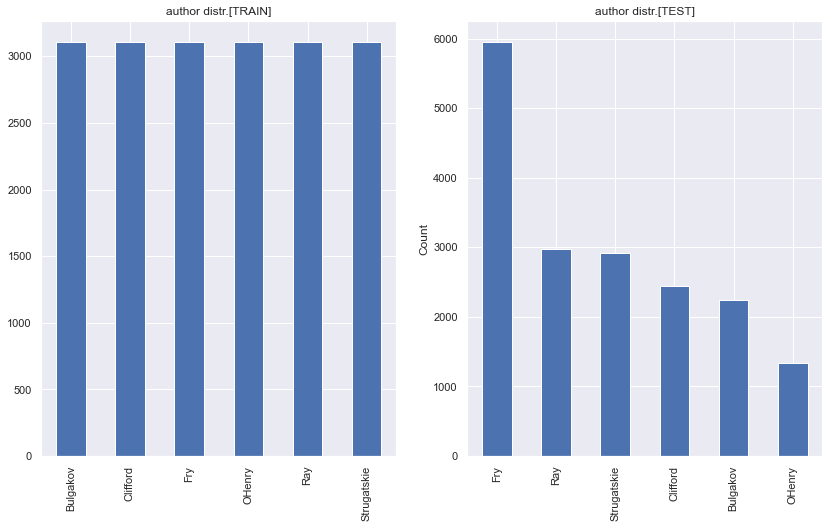

In [21]:
## plot rebalanced target distr.
_, ax = plt.subplots(1,2, figsize=(14,8))
u.discrete_distr(train_data, ax=ax[0], suffix='[TRAIN]')
u.discrete_distr(test_data, ax=ax[1], suffix='[TEST]')

In [25]:
if not LOAD_DIR_CLEAN_DATA.exists(): 
    os.mkdir(LOAD_DIR_CLEAN_DATA)
    
## save clean data to parquet files: 
train_data.to_parquet(LOAD_DIR_CLEAN_DATA / "train_data.gz")
test_data.to_parquet(LOAD_DIR_CLEAN_DATA / "test_data.gz")